In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [2]:
data = pd.read_csv("D:\house-prices.csv")


In [3]:
print(data.head())


   Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2    No         East
1     2  114200  2030         4          2       3    No         East
2     3  114800  1740         3          2       1    No         East
3     4   94700  1980         3          2       3    No         East
4     5  119800  2130         3          3       3    No         East


In [4]:
print(data.isnull().sum())


Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64


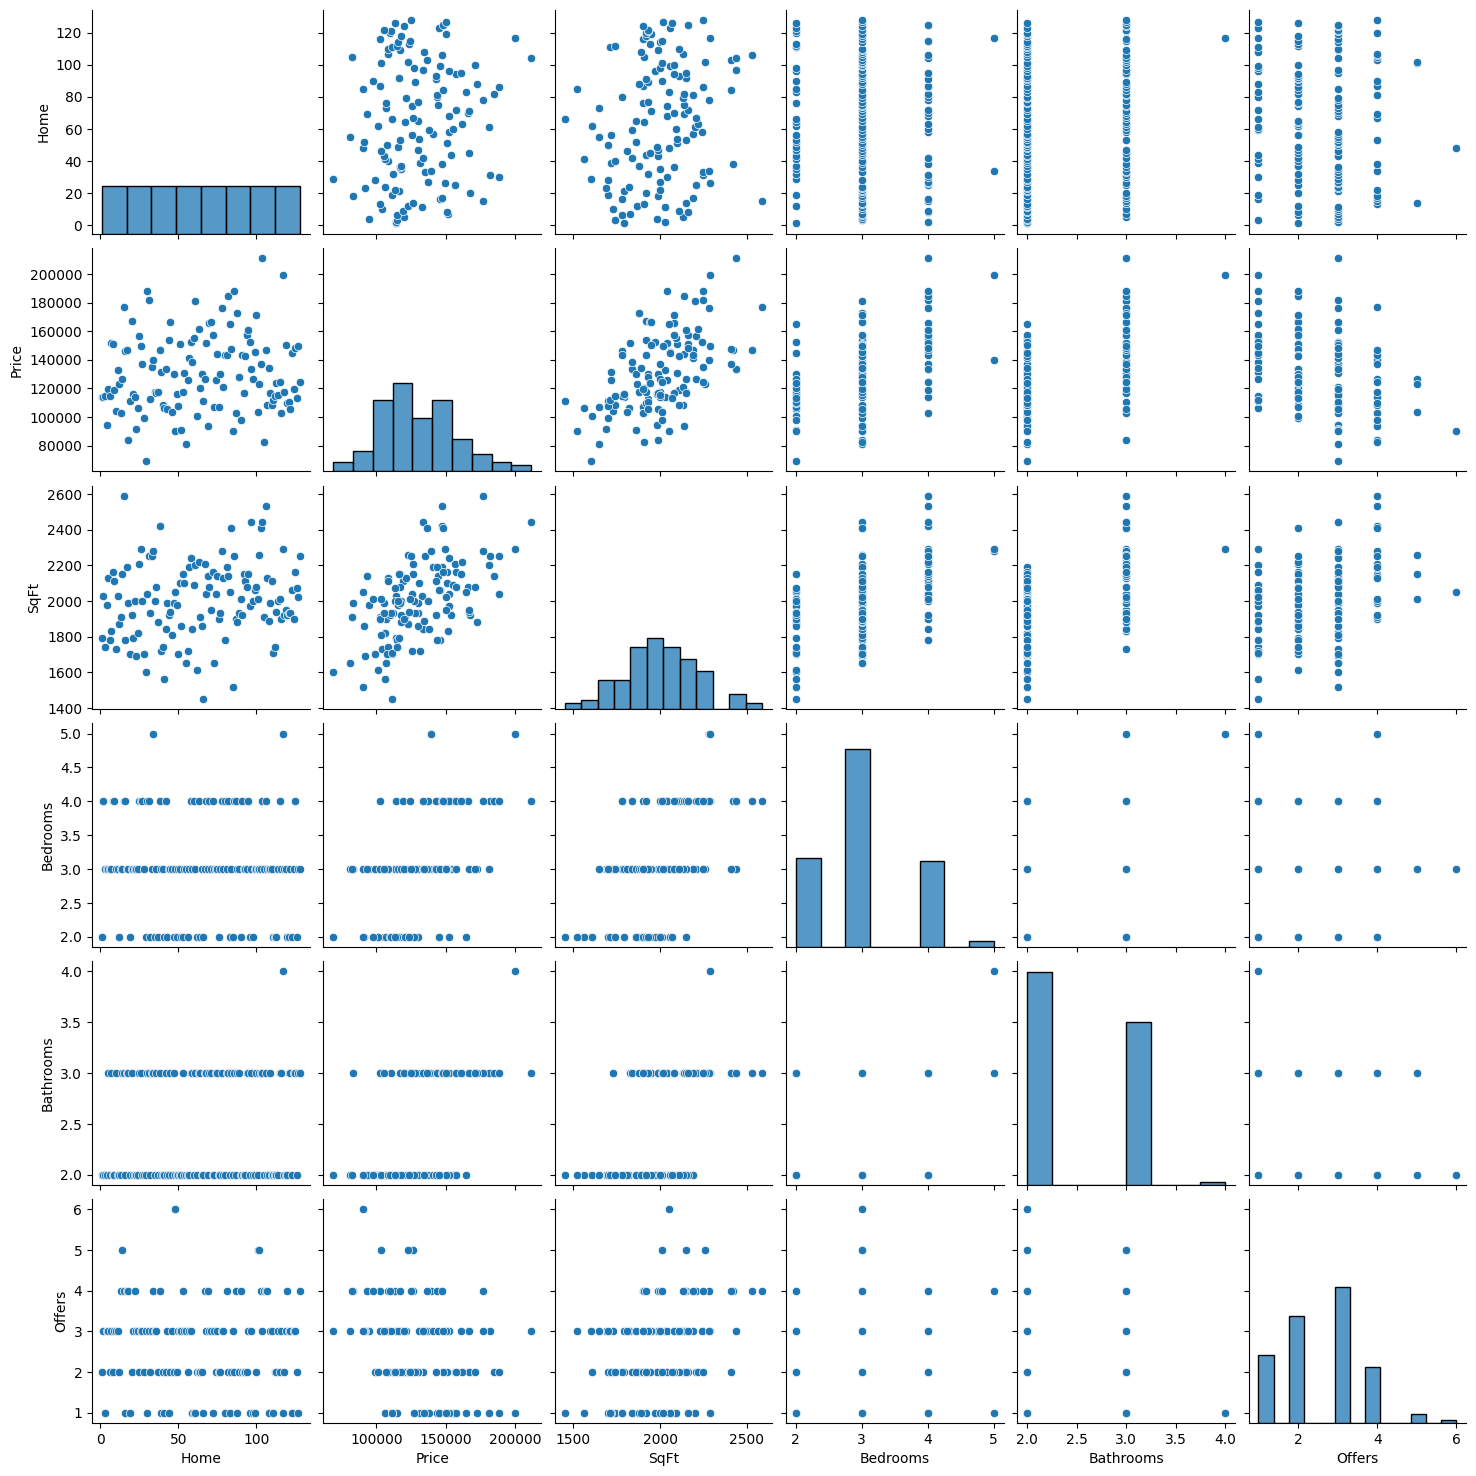

In [5]:
sns.pairplot(data)
plt.show()

In [6]:
data.fillna(data.mean(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2468\3925498781.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
features = data[['Bedrooms', 'SqFt']]
scaled_features = scaler.fit_transform(features)

In [11]:
target = data['Price']

In [12]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [14]:
from sklearn.metrics import mean_squared_error, r2_score


mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5


r_squared = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r_squared}')


Mean Squared Error: 350174023.4752686
Root Mean Squared Error: 18712.93732889812
R-squared: 0.40587939831567554


In [15]:
coefficients = pd.DataFrame(model.coef_, features.columns, columns=['Coefficient'])
print(coefficients)


           Coefficient
Bedrooms   8687.170514
SqFt      11600.180926
